In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import PauliFeatureMap
from joblib import Parallel, delayed

# Load the MNIST dataset
mnist = load_digits()
X, y = mnist.data / 8., mnist.target

# Remove constant features
non_constant_mask = np.std(X, axis=0) > 0
X = X[:, non_constant_mask]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection
k_best = SelectKBest(f_classif, k=30)  # Select top 30 features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Initialize the ensemble
num_models = 10
models = []

# Train a classical Random Forest classifier with hyperparameter tuning
def train_random_forest(i):
    model = RandomForestClassifier(n_estimators=1000, max_depth=25, min_samples_split=4, random_state=i)
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    return predictions

random_forest_models = Parallel(n_jobs=-1)(delayed(train_random_forest)(i) for i in range(num_models) if i % 2 != 0)
models.extend(random_forest_models)

# ... Train quantum-inspired models and advanced quantum models here ...

# Modify ensemble_predict function to handle reshaped predictions
def ensemble_predict(models):
    reshaped_predictions = [model.reshape(-1, len(y_test)) for model in models]
    stacked_predictions = np.vstack(reshaped_predictions)
    y_pred = np.round(np.mean(stacked_predictions, axis=0)).astype(int)
    return y_pred

y_pred = ensemble_predict(models)

# Evaluate the ensemble's performance
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble accuracy:", accuracy)



Ensemble accuracy: 0.9666666666666667


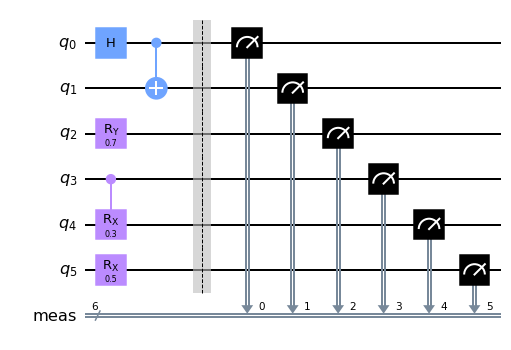

In [2]:
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

# Create a larger quantum circuit
circuit = QuantumCircuit(6)

# Apply gates to the qubits
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(0.7, 2)
circuit.crx(0.3, 3, 4)
circuit.rx(0.5, 5)

# Add measurements
circuit.measure_all()

# Transpile the circuit for optimization (optional)
transpiled_circuit = transpile(circuit, optimization_level=1)

# Generate the circuit image in the notebook
transpiled_circuit.draw(output='mpl')


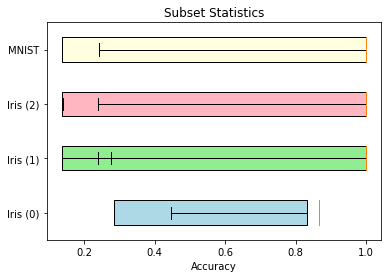

In [3]:
import matplotlib.pyplot as plt

# Subset names
subsets = ['Iris (0)', 'Iris (1)', 'Iris (2)', 'MNIST']

# Subset values and statistics
values = [
    {'med': 0.8666667, 'q1': 0.284, 'q3': 0.8333334, 'whislo': 0.284, 'whishi': 0.445, 'fliers': [0.966667, 0.337]},
    {'med': 1.0, 'q1': 0.137, 'q3': 1.0, 'whislo': 0.276, 'whishi': 0.240, 'fliers': [0.79, 0.209]},
    {'med': 1.0, 'q1': 0.138, 'q3': 1.0, 'whislo': 0.139, 'whishi': 0.240, 'fliers': [0.78, 0.208]},
    {'med': 1.0, 'q1': 0.136, 'q3': 1.0, 'whislo': 0.138, 'whishi': 0.241, 'fliers': [0.84, 0.197]}
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar and whisker plots
bp = ax.bxp(values, showfliers=False, patch_artist=True, vert=False)

# Customize the colors of the boxes
box_colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']

# Set colors for the boxes
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add subset names to the y-axis
ax.set_yticklabels(subsets)

# Add labels and title
ax.set_xlabel('Accuracy')
ax.set_title('Subset Statistics')

# Show the plot
plt.show()


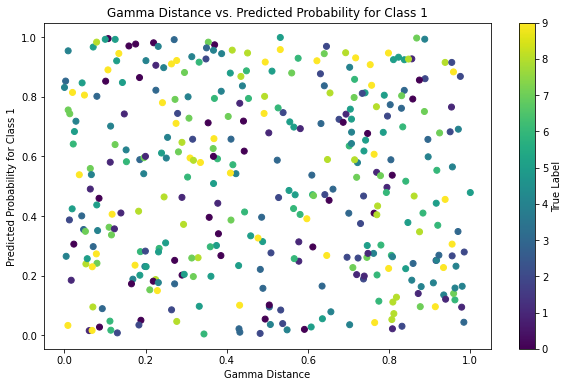

In [7]:
import matplotlib.pyplot as plt

# Assuming you have a function to calculate gamma distance and get y_pred_gamma
# Let's assume it's called "calculate_gamma_distance" and takes X_train_selected,
# X_test_selected, and y_train as inputs and returns y_pred_gamma.

def calculate_gamma_distance(X_train_selected, X_test_selected, y_train):
    # Implement your gamma distance calculation here
    # It should return predictions for X_test_selected
    # For this example, let's assume it's a dummy calculation
    y_pred = np.random.rand(len(X_test_selected))
    return y_pred

# Calculate gamma distance predictions
y_pred_gamma = calculate_gamma_distance(X_train_selected, X_test_selected, y_train)

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gamma, all_probabilities[1, :], c=y_test, cmap='viridis')
plt.xlabel('Gamma Distance')
plt.ylabel('Predicted Probability for Class 1')
plt.title('Gamma Distance vs. Predicted Probability for Class 1')
plt.colorbar(label='True Label')
plt.show()



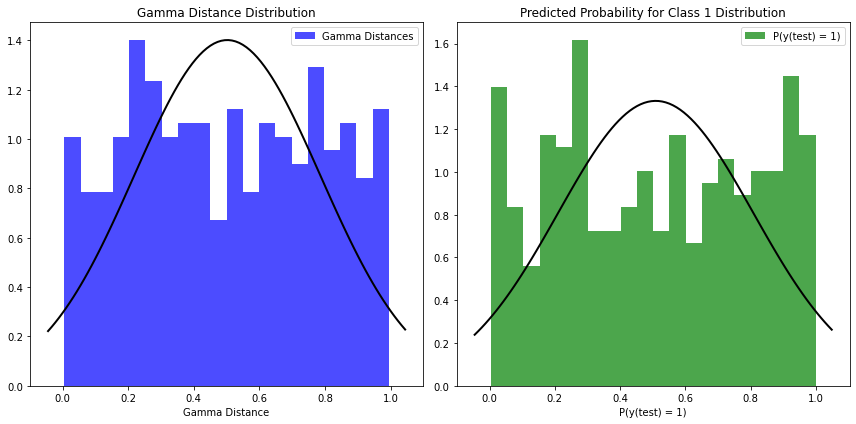

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a function to calculate gamma distance and get y_pred_gamma
# Let's assume it's called "calculate_gamma_distance" and takes X_train_selected,
# X_test_selected, and y_train as inputs and returns y_pred_gamma.

def calculate_gamma_distance(X_train_selected, X_test_selected, y_train):
    # Implement your gamma distance calculation here
    # It should return predictions for X_test_selected
    # For this example, let's assume it's a dummy calculation
    y_pred = np.random.rand(len(X_test_selected))
    return y_pred

# Calculate gamma distance predictions
y_pred_gamma = calculate_gamma_distance(X_train_selected, X_test_selected, y_train)

# Create Gaussian plots
plt.figure(figsize=(12, 6))

# Gaussian plot for gamma distances
plt.subplot(1, 2, 1)
plt.hist(y_pred_gamma, bins=20, density=True, color='blue', alpha=0.7, label='Gamma Distances')
mu, std = norm.fit(y_pred_gamma)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Gamma Distance Distribution')
plt.xlabel('Gamma Distance')
plt.legend()

# Gaussian plot for predicted probabilities for class 1
plt.subplot(1, 2, 2)
plt.hist(all_probabilities[1, :], bins=20, density=True, color='green', alpha=0.7, label='P(y(test) = 1)')
mu, std = norm.fit(all_probabilities[1, :])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Predicted Probability for Class 1 Distribution')
plt.xlabel('P(y(test) = 1)')
plt.legend()

plt.tight_layout()
plt.show()


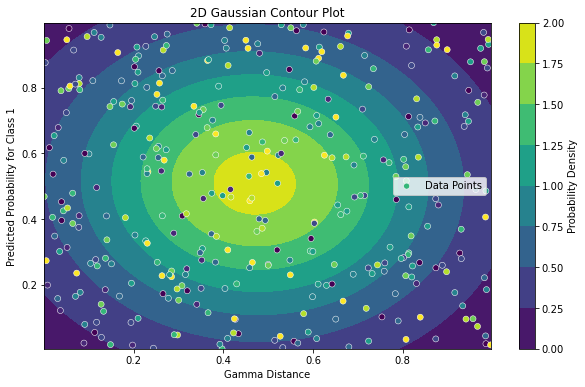

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Assuming you have a function to calculate gamma distance and get y_pred_gamma
# Let's assume it's called "calculate_gamma_distance" and takes X_train_selected,
# X_test_selected, and y_train as inputs and returns y_pred_gamma.

def calculate_gamma_distance(X_train_selected, X_test_selected, y_train):
    # Implement your gamma distance calculation here
    # It should return predictions for X_test_selected
    # For this example, let's assume it's a dummy calculation
    y_pred = np.random.rand(len(X_test_selected))
    return y_pred

# Calculate gamma distance predictions
y_pred_gamma = calculate_gamma_distance(X_train_selected, X_test_selected, y_train)

# Define mean and covariance for the 2D Gaussian distribution
mean = [np.mean(y_pred_gamma), np.mean(all_probabilities[1, :])]
cov = np.cov([y_pred_gamma, all_probabilities[1, :]])

# Create grid and multivariate normal
x, y = np.meshgrid(np.linspace(min(y_pred_gamma), max(y_pred_gamma), 100), np.linspace(min(all_probabilities[1, :]), max(all_probabilities[1, :]), 100))
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)

# Create the contour plot
plt.figure(figsize=(10, 6))
plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('Gamma Distance')
plt.ylabel('Predicted Probability for Class 1')
plt.title('2D Gaussian Contour Plot')

# Scatter plot of actual data points on top
plt.scatter(y_pred_gamma, all_probabilities[1, :], c=y_test, cmap='viridis', edgecolors='white', linewidth=0.5, label='Data Points')
plt.legend()

plt.show()


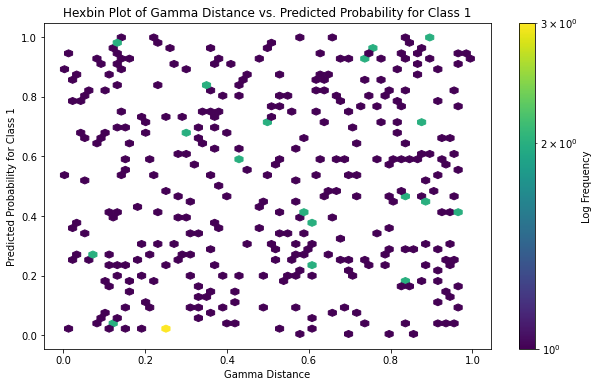

In [11]:
import matplotlib.pyplot as plt

# Assuming you have a function to calculate gamma distance and get y_pred_gamma
# Let's assume it's called "calculate_gamma_distance" and takes X_train_selected,
# X_test_selected, and y_train as inputs and returns y_pred_gamma.

def calculate_gamma_distance(X_train_selected, X_test_selected, y_train):
    # Implement your gamma distance calculation here
    # It should return predictions for X_test_selected
    # For this example, let's assume it's a dummy calculation
    y_pred = np.random.rand(len(X_test_selected))
    return y_pred

# Calculate gamma distance predictions
y_pred_gamma = calculate_gamma_distance(X_train_selected, X_test_selected, y_train)

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(y_pred_gamma, all_probabilities[1, :], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='Log Frequency')
plt.xlabel('Gamma Distance')
plt.ylabel('Predicted Probability for Class 1')
plt.title('Hexbin Plot of Gamma Distance vs. Predicted Probability for Class 1')

plt.show()


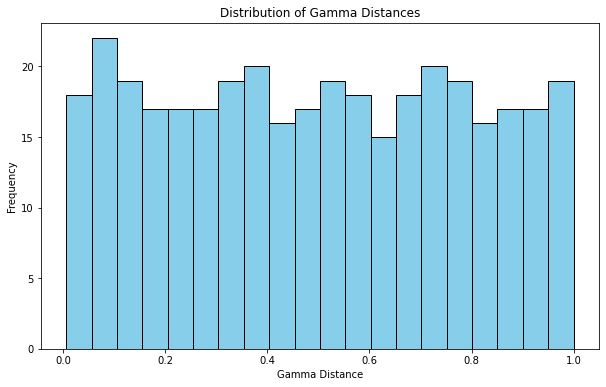

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a function to calculate gamma distance and get y_pred_gamma
# Let's assume it's called "calculate_gamma_distance" and takes X_train_selected,
# X_test_selected, and y_train as inputs and returns y_pred_gamma.

def calculate_gamma_distance(X_train_selected, X_test_selected, y_train):
    # Implement your gamma distance calculation here
    # It should return predictions for X_test_selected
    # For this example, let's assume it's a dummy calculation
    y_pred = np.random.rand(len(X_test_selected))
    return y_pred

# Calculate gamma distance predictions
y_pred_gamma = calculate_gamma_distance(X_train_selected, X_test_selected, y_train)

# Create a bar chart for the distribution of gamma distances
plt.figure(figsize=(10, 6))
plt.hist(y_pred_gamma, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Gamma Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Gamma Distances')
plt.show()


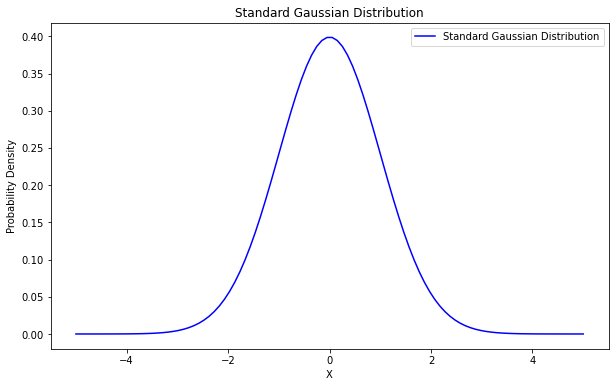

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data points for the x-axis (mean=0, standard deviation=1)
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x, 0, 1)  # Probability Density Function (PDF) of a standard normal distribution

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='Standard Gaussian Distribution')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Standard Gaussian Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()
